### Data Preparation for Bayesian Filter

install dependencies....

In [1]:
!pip install beautifulsoup4

In [2]:
!pip install wordcloud

In [3]:
#we are importing all the libraries we would like to use.
#including data stores for stopwords and such
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import os
import io
%matplotlib inline

### This function reads the files in the specified path.

In [4]:
def read_files(path):
    #this function is reading the actual email files.
    #the function will cycle through all the files in the folder specified.
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root,filename)
            
            inBody = False
            lines = []
            #this uses IO functions to read the files by specifying the encoding type
            f = io.open(path, 'r', encoding = 'latin1')
            #this cycles through each line and fetches the text therein.
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            #join the text into a single message.
            message = '\n'.join(lines)
            #return the message
            yield path, message
                    

### This function is for creating dataframes from the dataset in question... it also classifies the emails into either ham or spam

In [5]:
#this classifies the emails into spam or ham depending on predetermined status.
def dataFrameFromDirectory(path, classification):
    #instantiate the structure of the dataframe needed.
    rows = []
    index = []
    #store the message alongside its classification.
    for filename, message in read_files(path):
        rows.append({'message': message, 'label': classification})
        index.append(filename)
        #return the dataframe to be used for manipulation
    return pd.DataFrame(rows, index=index)

aggregate all the emails into a single dataframe. The key is: ham = 0, spam = 1

In [6]:
#fetch the data from the source files.
#here you run the datasets sequentially for validation by specifying file name. 

data = pd.DataFrame({'message':[],'label':[]})
data = data.append(dataFrameFromDirectory("datasets/ham3",0))
data = data.append(dataFrameFromDirectory("datasets/spam3",1))
data

,message,label
datasets/ham3\0006.ee8b0dba12856155222be180ba122058,"> in adding cream to spaghetti carbonara, whi...",0.0
datasets/ham3\0007.c75188382f64b090022fa3b095b020b0,\n\n> I just had to jump in here as Carbonara ...,0.0
datasets/ham3\0010.4996141de3f21e858c22f88231a9f463,The Scotsman\n\n\n\n Thu 22 Aug 2002 \n\n\n\n ...,0.0
datasets/ham3\0013.ff597adee000d073ae72200b0af00cd1,"Hello, have you seen and discussed this articl...",0.0
datasets/ham3\0015.a9ff8d7550759f6ab62cc200bdf156e7,I don't know how make of you are in the Bay Ar...,0.0
...,...,...
datasets/spam3\0472.40695f88feb07754e40b1008aeb47bd1,<html>\n\n<head>\n\n<title>Tell Me Where to Se...,1.0
datasets/spam3\0476.0530ef1b33305fdf919489946570685b,"Mr.Vincent Nnaji,\n\n Standard Trust Bank Ltd,...",1.0
datasets/spam3\0488.6d41f6d7222978a3ee2b6cfbfce55a02,"<html>\n\n<TABLE id=AutoNumber2 style=""BORDER-...",1.0
datasets/spam3\0491.f47154f78397c57b14e05450a16745d5,"Dear Sir/Madam,\n\n\n\nI am well confident of ...",1.0


The below cell shows the number of rows in our dataframe.

In [7]:
total_mails = data['message'].shape[0]
total_mails

600

The function below extracts all text from html text present in all emails.

In [8]:
#this is for scraping the emails, since most are in the form of html based content.
from bs4 import BeautifulSoup

def func(df):
    soup = BeautifulSoup(df['message'], "html.parser").find()
    #check emails with html syntax
    if bool(soup):
        soup = BeautifulSoup(df['message'], "html.parser")
        #extract text only from the whole email.
    
        text = soup.find_all(text=True)
      
        #return all the words found.
        text = ''.join(word for word in  text)
        df['message'] = text
        
        return text
    else:
        
        return df['message'] 

In [9]:
import email

def using_emailing_function(df):

#     msg = email.message_from_string(df['message'])
#     for part in msg.walk():
#         print(df['message'])
        
    msg = email.message_from_string(df['message'])
    if msg.is_multipart():
        for payload in msg.get_payload():
            # if payload.is_multipart(): ...
#             print(payload.get_payload())
            soup = BeautifulSoup(payload.get_payload(), "lxml").find()
            if bool(soup):
                print(payload.get_payload())
            else:
                print(payload.get_payload())
    else:
        soup = BeautifulSoup(msg.get_payload(), "lxml").find()
        if bool(soup):
                print(msg.get_payload())
#         else:
#             print(msg.get_payload())



In [10]:
new_data = data.reset_index()
new_data

,index,message,label
0,datasets/ham3\0006.ee8b0dba12856155222be180ba1...,"> in adding cream to spaghetti carbonara, whi...",0.0
1,datasets/ham3\0007.c75188382f64b090022fa3b095b...,\n\n> I just had to jump in here as Carbonara ...,0.0
2,datasets/ham3\0010.4996141de3f21e858c22f88231a...,The Scotsman\n\n\n\n Thu 22 Aug 2002 \n\n\n\n ...,0.0
3,datasets/ham3\0013.ff597adee000d073ae72200b0af...,"Hello, have you seen and discussed this articl...",0.0
4,datasets/ham3\0015.a9ff8d7550759f6ab62cc200bdf...,I don't know how make of you are in the Bay Ar...,0.0
...,...,...,...
595,datasets/spam3\0472.40695f88feb07754e40b1008ae...,<html>\n\n<head>\n\n<title>Tell Me Where to Se...,1.0
596,datasets/spam3\0476.0530ef1b33305fdf9194899465...,"Mr.Vincent Nnaji,\n\n Standard Trust Bank Ltd,...",1.0
597,datasets/spam3\0488.6d41f6d7222978a3ee2b6cfbfc...,"<html>\n\n<TABLE id=AutoNumber2 style=""BORDER-...",1.0
598,datasets/spam3\0491.f47154f78397c57b14e05450a1...,"Dear Sir/Madam,\n\n\n\nI am well confident of ...",1.0


In [11]:
#this removes all text that is not alphanumeric i.e special characters.
new_data[new_data['message'].str.isalnum()]

,index,message,label


split the data into the pareto principle for unbiased model testing.
so 80% will be used for training and 20% for testing.
this will be accomplished by using a random number generator to randomize the order by implementing a uniform distribution randomizer. this removes all chances of having a biased model on account of sequential data.

In [12]:
#split the data into training and testing sets
#initializing empty lists to hold training and testing data respectively
train_index, test_index = list(), list()
for i in range(data['message'].shape[0]):
    #make use of the uniform random distribution to alleviate contiguousness of pseudo-random number generators.
    #80% for training and 20% for testing according to the pareto principle.
    if np.random.uniform(0,1) < 0.80:
        train_index.append(i)
    else:
        test_index.append(i)
#training data dataframe.
train_data = new_data.loc[train_index]
#test data dataframe
test_data = new_data.loc[test_index]

In [13]:
train_data.apply(using_emailing_function, axis = 1) 

>  in adding cream to spaghetti carbonara, which has the same effect on pasta as

>  making a pizza a deep-pie; 



I just had to jump in here as Carbonara is one of my favourites to make and ask 

what the hell are you supposed to use instead of cream?  I've never seen a 

recipe that hasn't used this.  Personally I use low fat creme fraiche because it 

works quite nicely but the only time I've seen an supposedly authentic recipe 

for carbonara  it was identical to mine (cream, eggs and lots of fresh parmesan) 

except for the creme fraiche.



Stew

-- 

Stewart Smith

Scottish Microelectronics Centre, University of Edinburgh.

http://www.ee.ed.ac.uk/~sxs/





------------------------ Yahoo! Groups Sponsor ---------------------~-->

4 DVDs Free +s&p Join Now

http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM

---------------------------------------------------------------------~->



To unsubscribe from this group, send an email to:

forteana-unsubscribe@egroups.com



 





This is a multi-part message in MIME format.

It has been signed conforming to RFC2015.

You'll need PGP or GPG to check the signature.



------------=_1031266655-417-16

Content-Type: text/plain; charset=us-ascii





On Thu, 05 Sep 2002 14:40:53 PDT, Siva Doriaswamy writes:

>Recently, my incoming mail (or spool) location moved to another disk.

>I'm not quite clear how to reconfigure procmail/rcvstore/exmh to accept

>mail from the new location.



How do you feed procmail? Not with a .forward, I'd guess.



How does mail enter your system anyway? Per fetchmail maybe? Or direct 

 SMTP-delivery? Or does it just magically hit your spool?



Lotsa questions...



cheers,

&rw

-- 

-- Booze: because one doesn't solve the world's problems over white wine.







------------=_1031266655-417-16

Content-Type: application/pgp-signature; name="signature.ng"

Content-Disposition: inline; filename="signature.ng"

Content-Transfer-Encoding: 7bit



-----BEGIN PGP SIGNATURE-----

Version: G


Date: 2002-09-27T09:52:32+01:00



(The Japan Times)





Date: 2002-09-27T02:45:51+01:00



(DeKalb Daily Chronicle)





Date: 2002-09-29T01:41:02+01:00



PM rules out compromise on public service reform in hard-hitting pre-conference 

interview.





Date: 2002-09-29T00:39:58+01:00



*Politics:* She was vivacious, he was Mr Grey. Theirs was a love no one 

imagined.





Date: 2002-09-12T23:03:40-08:00



If you've been in Los Angeles for long enough to read this sentence, chances 

are you've spent more time stuck in traffic than you would care to consider. 

That annoying fact of Southern California life is only going to become more 

annoying and more of a factor with time, which is the point of "Car Trek," 

tonight's edition of "By the Year 2000" at 7:30 on KCET (Channel 28) [which] 

also looks at the phenomena of "carcooning" in which...





Date: 2002-09-24T02:35:59-08:00



You are not still using sourceforge, are you? If you have any hopes that they 

are anything but


REGISTER .COM, .BIZ, AND .INFO DOMAINS FOR ONLY $14.95





The new domain names are finally available to the general public at discount prices. Now you can register one of the exciting new .BIZ or .INFO domain names, as well as the original .COM and .NET names for just $14.95. These brand new domain extensions were recently approved by ICANN and have the same rights as the original .COM and .NET domain names. The biggest benefit is of-course that the .BIZ and .INFO domain names are currently more available. i.e. it will be much easier to register an attractive and easy-to-remember domain name for the same price.  Visit: http://www.domainsforeveryone.com/ today for more info.

 

Register your domain name today for just $14.95 at: http://www.domainsforeveryone.com/  Registration fees include full access to an easy-to-use control panel to manage your domain name in the future.

 

Sincerely,

 

Domain Administrator

Domains For Everyone





To remove your email address from further p

0      None
1      None
2      None
3      None
4      None
       ... 
594    None
595    None
596    None
597    None
598    None
Length: 481, dtype: object

implement the data cleaning of the html based messages
    

In [14]:
#here we  apply the scraping function to our data. hence cleaning it.
train_data['message'] = train_data.apply(func, axis=1)
test_data['message'] = test_data.apply(func, axis=1)
train_data #its just expecting the data to come from a website and not a dataframe.

,index,message,label
0,datasets/ham3\0006.ee8b0dba12856155222be180ba1...,"> in adding cream to spaghetti carbonara, whi...",0.0
1,datasets/ham3\0007.c75188382f64b090022fa3b095b...,\n\n> I just had to jump in here as Carbonara ...,0.0
2,datasets/ham3\0010.4996141de3f21e858c22f88231a...,The Scotsman\n\n\n\n Thu 22 Aug 2002 \n\n\n\n ...,0.0
3,datasets/ham3\0013.ff597adee000d073ae72200b0af...,"Hello, have you seen and discussed this articl...",0.0
4,datasets/ham3\0015.a9ff8d7550759f6ab62cc200bdf...,I don't know how make of you are in the Bay Ar...,0.0
...,...,...,...
594,datasets/spam3\0471.f3cd3e181577b34e474bea8c48...,Hi -\n\n\n\n( http://club.4tfox.com )\n\n\n\nY...,1.0
595,datasets/spam3\0472.40695f88feb07754e40b1008ae...,\n\nTell Me Where to Send Your Health Card\n\n...,1.0
596,datasets/spam3\0476.0530ef1b33305fdf9194899465...,"Mr.Vincent Nnaji,\n\n Standard Trust Bank Ltd,...",1.0
597,datasets/spam3\0488.6d41f6d7222978a3ee2b6cfbfc...,\n\n\n\n\n\n\nNever Pay Retail!\n\n\n\n\n\n\n\...,1.0


In [15]:
import re #regular expression. it is used to perform word searches.

train_data['message'] = train_data['message'].map(lambda x: re.sub(r'\W+', ' ', x))
test_data['message'] = test_data['message'].map(lambda x: re.sub(r'\W+', ' ', x))

In [16]:
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [17]:
train_data['message'].str.isalnum()

0      False
1      False
2      False
3      False
4      False
       ...  
476    False
477    False
478    False
479    False
480    False
Name: message, Length: 481, dtype: bool

In [18]:
test_data

,index,message,label
0,datasets/ham3\0037.0c57a93c0241775d406efecf43b...,Thanks Paul That is the way I am doing right n...,0.0
1,datasets/ham3\0100.1728f45047ff2a1601d4e3ee91f...,I am trying to rebuild the recently posted ALS...,0.0
2,datasets/ham3\0121.b475478456e52de66ef0b0fb501...,Hi All I m trying to set up the following 1 A ...,0.0
3,datasets/ham3\0123.32e1738c4171dd9d70b727fd797...,I think I ll ask this question again as I sent...,0.0
4,datasets/ham3\0130.6007e5b54c03026fd924cf2d6b0...,I just saw the ISOs on an internal server here...,0.0
...,...,...,...
114,datasets/spam3\0394.9c882c72ddfd810b56776fdaa1...,FREE Liz Claiborne Fragrance For The Fall Con...,1.0
115,datasets/spam3\0406.4b29229820cc5e9675ad369a3a...,Home Page If this promotion has reached you i...,1.0
116,datasets/spam3\0414.4b85e87c5b9235c72f189bf044...,_NextPart_000_002B_83A1E322 4D8B344B Content ...,1.0
117,datasets/spam3\0461.27302a2e94d8948f8a81a7d4c8...,Hello Dmm Discount Mortgage Millionaire Progr...,1.0


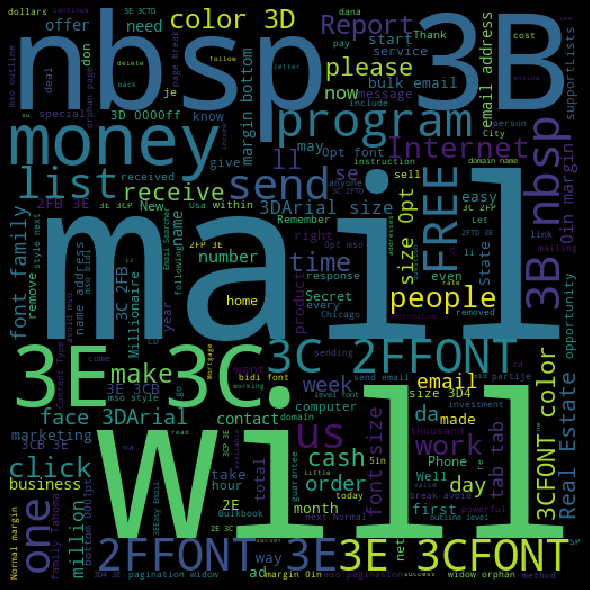

In [19]:
#visual representation of the most salient words.
#this is the visulization for the spam.
spam_words = ' '.join(str(moja) for moja in list(test_data[test_data['label'] == 1]['message']))
spamwc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spamwc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

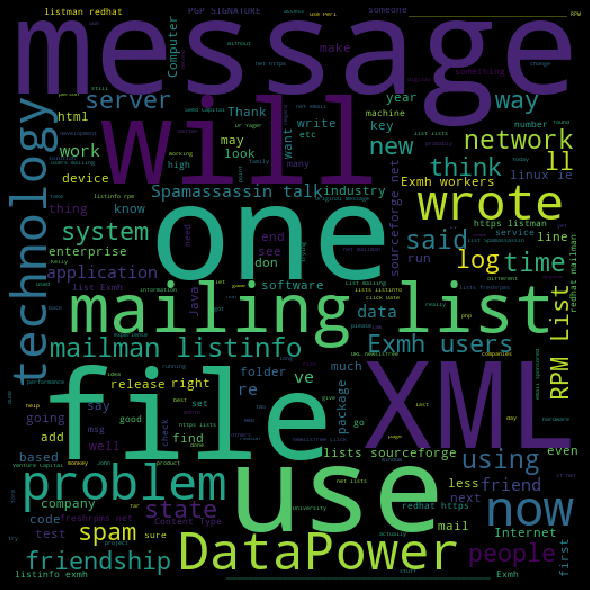

In [20]:
#Visualize the ham data
spam_words = ' '.join(str(moja) for moja in list(test_data[test_data['label'] == 0]['message']))
spamwc = WordCloud(width = 512, height=512).generate(spam_words)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spamwc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

distribution by value

In [21]:
train_data['label'].value_counts() #remove the paragraph line

0.0    403
1.0     78
Name: label, dtype: int64

In [22]:
#tokenizing and processing the words harnessed.
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    #lower case all the letters in the message.
    if lower_case:
        message = message.lower()
    #break down the words into tokens.
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
#     print(words)
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        #fetch all words that do not have meaning in this case: stopwords.
        sw = stopwords.words('english')
        #create a list of words containing only the words without stopwords
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
#     print(words)
    return words

In [23]:
train_data.columns

Index(['index', 'message', 'label'], dtype='object')

In [24]:
#this whole function is the bayesian classifier. the calc_prob calculates the probability of a word bein either spam or ham.
#the classify function returns true if the threshold for it being spam has been reached. otherwise, it is false, meaning ham.
class SpamClassifier(object):
    def __init__(self, train_data, method = 'tf-idf'):
        #initialize the data to be used for processing. i.e training data.
        self.mails, self.labels = train_data['message'], train_data['label']
        self.method = method

    def train(self):
        #this function trains our model.
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        # initialize variables to calculate probabilities. i.e probability of being ham or spam. using normal probabilistic theory.
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            #if word is spam create a dictionary with the key being the word and the value being the probability of it being spam.
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            #if word is ham, create a dictionary with the key being the ham word and the value being its probability of being ham.
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        self.missing_index = [number for number in range(0,noOfMessages) if number not in self.mails.index ]
        for i in range(noOfMessages):
            if i not in self.missing_index:
                message_processed = process_message(self.mails[i])
                count = list() #To keep track of whether the word has ocured in the message or not.
                               #For IDF
                for word in message_processed:
                    if self.labels[i]:
                        self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                        self.spam_words += 1
                    else:
                        self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                        self.ham_words += 1
                    if word not in count:
                        count += [word]
                for word in count:
                    if self.labels[i]:
                        self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                    else:
                        self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
       #the method that does the actual classifying.             
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                try:
                    if self.method == 'tf-idf':
                        pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                    else:
                        pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
                except:
                    print('oops')
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                try:
                    if self.method == 'tf-idf':
                        pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                    else:
                        pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
                except:
                    print('oops')
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
            #if probability of spam is higher, it returns true.
            return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
        
            result[i] = int(self.classify(processed_message))
        return result

In [25]:
def metrics(labels, predictions): #Confusion matrix function
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [26]:
#this checks for the metrics 
sc_bow = SpamClassifier(train_data, 'bow') 
sc_bow.train()
preds_bow = sc_bow.predict(test_data['message'])
metrics(test_data['label'], preds_bow)

Precision:  0.5
Recall:  0.09090909090909091
F-score:  0.15384615384615385
Accuracy:  0.8151260504201681


In [27]:
#this checks for the metrics based on tf-idf
sc_tf_idf = SpamClassifier(train_data, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(test_data['message'])
metrics(test_data['label'], preds_tf_idf) 

Precision:  0.5
Recall:  0.09090909090909091
F-score:  0.15384615384615385
Accuracy:  0.8151260504201681


In [28]:
pm = process_message("No, this isn't a reference for the website which you used. Your reference implies that you are paraphrasing information from the actual article which clearly you are not doing.")
sc_tf_idf.classify(pm)

False